In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
ammonium = pd.read_parquet('data/Chemical measurements influent 2023_2024/ammonium_2024.parquet')
ammonium = ammonium.rename(columns={"hstWaarde": "hstWaarde_ammonium"})

nitrate = pd.read_parquet('data/Chemical measurements influent 2023_2024/nitrate_2024.parquet')
nitrate = nitrate.rename(columns={"hstWaarde": "hstWaarde_nitrate"})

phosphate = pd.read_parquet('data/Chemical measurements influent 2023_2024/phosphate_2024.parquet')
phosphate = phosphate.rename(columns={"hstWaarde": "hstWaarde_phosphate"})

oxygen_a = pd.read_parquet('data/OxygenData2024/oxygen_a_2024.parquet')
oxygen_a = oxygen_a.rename(columns={"hstWaarde": "hstWaarde_oxygen_a"})

oxygen_b = pd.read_parquet('data/OxygenData2024/oxygen_b_2024.parquet')
oxygen_b = oxygen_b.rename(columns={"hstWaarde": "hstWaarde_oxygen_b"})

combined = pd.concat([ammonium, nitrate, phosphate, oxygen_a, oxygen_b], axis=1)
combined = combined.drop(columns=['historianTagnummer', 'datumBeginMeting', 'datumEindeMeting', 'waardebewerkingsmethodeCode'])
combined = combined.apply(pd.to_numeric, errors='coerce')

In [17]:
print(combined)

       hstWaarde_ammonium  hstWaarde_nitrate  hstWaarde_phosphate  \
0                   1.310              4.730                0.001   
1                   1.251              4.730                0.001   
2                   1.182              4.730                0.000   
3                   1.181              4.675                0.000   
4                   1.179              4.605                0.000   
...                   ...                ...                  ...   
44635               1.688              8.916                0.160   
44636               1.665              9.059                0.139   
44637               1.642              9.073                0.097   
44638               1.619              9.088                0.096   
44639               1.496              9.102                0.095   

       hstWaarde_oxygen_a  hstWaarde_oxygen_b  
0                   1.663               0.777  
1                   1.789               0.982  
2                   2.105  

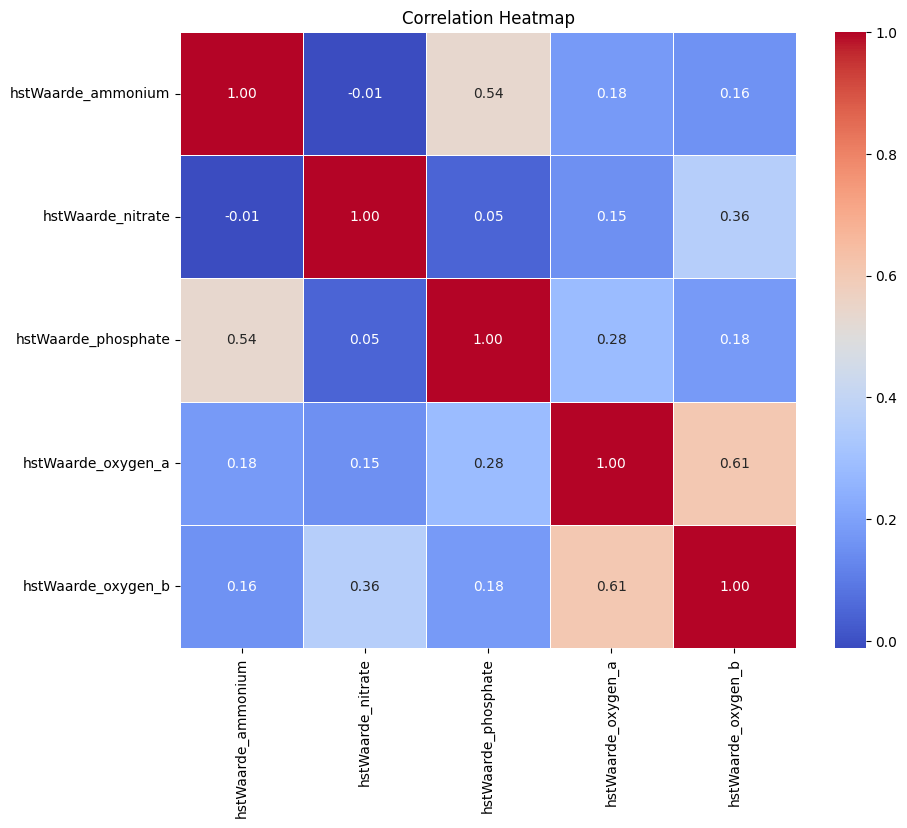

In [18]:
corr = combined.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
oxygen_a = pd.read_parquet('data/OxygenData2024/oxygen_a_2024.parquet')
legacy_oxygen_a = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofA_EDE_B121069901_K600.MTW.parquet')
merged_oxygen_a = pd.concat([legacy_oxygen_a, oxygen_a], ignore_index=True)
print(merged_oxygen_a)

             historianTagnummer hstWaarde     datumBeginMeting  \
0       EDE_B121069901_K600.MTW     0.003  2021-01-01 00:00:00   
1       EDE_B121069901_K600.MTW     0.003  2021-01-01 00:01:00   
2       EDE_B121069901_K600.MTW     0.003  2021-01-01 00:02:00   
3       EDE_B121069901_K600.MTW     0.003  2021-01-01 00:03:00   
4       EDE_B121069901_K600.MTW     0.003  2021-01-01 00:04:00   
...                         ...       ...                  ...   
961233  EDE_B121069901_K600.MTW     1.635  2023-12-31 23:55:00   
961234  EDE_B121069901_K600.MTW     1.841  2023-12-31 23:56:00   
961235  EDE_B121069901_K600.MTW     1.816  2023-12-31 23:57:00   
961236  EDE_B121069901_K600.MTW     1.812  2023-12-31 23:58:00   
961237  EDE_B121069901_K600.MTW     1.884  2023-12-31 23:59:00   

           datumEindeMeting waardebewerkingsmethodeCode  
0       2021-01-01 00:01:00                         NaN  
1       2021-01-01 00:02:00                         NaN  
2       2021-01-01 00:03:00      

In [29]:
oxygen_b = pd.read_parquet('data/OxygenData2024/oxygen_b_2024.parquet')
legacy_oxygen_b = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofB_EDE_B121069907_K600.MTW.parquet')
merged_oxygen_b = pd.concat([oxygen_b, legacy_oxygen_b], ignore_index=True)
print(merged_oxygen_b)

              historianTagnummer hstWaarde     datumBeginMeting  \
0        EDE_B121069907_K600.MTW     0.777  2023-01-01 00:00:00   
1        EDE_B121069907_K600.MTW     0.982  2023-01-01 00:01:00   
2        EDE_B121069907_K600.MTW     1.189  2023-01-01 00:02:00   
3        EDE_B121069907_K600.MTW     1.266  2023-01-01 00:03:00   
4        EDE_B121069907_K600.MTW     1.403  2023-01-01 00:04:00   
...                          ...       ...                  ...   
1050513  EDE_B121069907_K600.MTW     0.549  2021-12-31 23:55:00   
1050514  EDE_B121069907_K600.MTW     0.559  2021-12-31 23:56:00   
1050515  EDE_B121069907_K600.MTW     0.554  2021-12-31 23:57:00   
1050516  EDE_B121069907_K600.MTW     0.568  2021-12-31 23:58:00   
1050517  EDE_B121069907_K600.MTW     0.563  2021-12-31 23:59:00   

            datumEindeMeting waardebewerkingsmethodeCode  
0        2023-01-01 00:01:00                              
1        2023-01-01 00:02:00                              
2        2023-01-0

In [19]:
sensor_14 = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Data/EDE_B121069914_K600.MTW.parquet')
sensor_14

,historianTagnummer,hstWaarde,datumBeginMeting,datumEindeMeting
0,EDE_B121069914_K600.MTW,6.14,2021-01-01 00:00:00,2021-01-01 00:01:00
1,EDE_B121069914_K600.MTW,6.118,2021-01-01 00:01:00,2021-01-01 00:02:00
2,EDE_B121069914_K600.MTW,5.963,2021-01-01 00:02:00,2021-01-01 00:03:00
3,EDE_B121069914_K600.MTW,5.884,2021-01-01 00:03:00,2021-01-01 00:04:00
4,EDE_B121069914_K600.MTW,5.876,2021-01-01 00:04:00,2021-01-01 00:05:00
...,...,...,...,...
44635,EDE_B121069914_K600.MTW,6.89,2021-12-31 23:55:00,2021-12-31 23:56:00
44636,EDE_B121069914_K600.MTW,6.904,2021-12-31 23:56:00,2021-12-31 23:57:00
44637,EDE_B121069914_K600.MTW,6.985,2021-12-31 23:57:00,2021-12-31 23:58:00
44638,EDE_B121069914_K600.MTW,6.992,2021-12-31 23:58:00,2021-12-31 23:59:00
